In [1]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
data = yf.download('BTC-USD', start='2021-01-01', end='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df = data.copy()

In [4]:
df['sma_short'] = df.Close.rolling(12).mean()
df['sma_long'] = df.Close.rolling(26).mean()

In [5]:
sma_short = mpf.make_addplot(df['sma_short'], color='orange')
sma_long = mpf.make_addplot(df['sma_long'], color='y')

In [6]:
sma_list = [sma_short, sma_long]

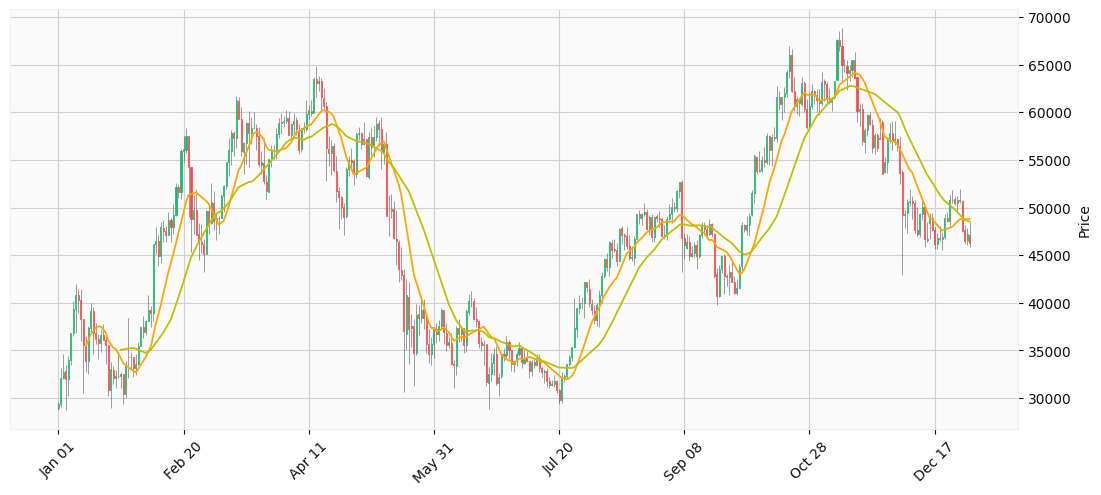

In [7]:
mpf.plot(df,style='yahoo', type='candle', addplot = sma_list, figsize=(14,6))

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long
Date,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901


In [9]:
df['trend'] = df['sma_short'] > df['sma_long']

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend
Date,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982,False
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869,False
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True


In [11]:
df['trend_shift'] = df.trend.shift(1)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift
Date,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982,False,False
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869,False,False
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True,False


In [13]:
df.loc[(df.trend == True) & (df.trend_shift == False),'action'] = 'buy'
df.loc[(df.trend == False) & (df.trend_shift == True),'action'] = 'sell'

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action
Date,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False,False,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False,False,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False,False,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982,False,False,NaN
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869,False,False,NaN
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True,False,buy


In [15]:
df[df.action=='buy']

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action
Date,,,,,,,,,,,
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,34918.725423,34886.486253,True,False,buy
2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595,51014.841797,50913.687200,True,False,buy
2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115,57354.408203,57292.442458,True,False,buy
2021-05-09,58877.390625,59210.882812,56482.003906,58232.316406,58232.316406,65906690347,56611.330729,56203.914363,True,False,buy
2021-06-17,38341.421875,39513.671875,37439.675781,38053.503906,38053.503906,37096670047,37162.793620,37107.821815,True,False,buy
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,39995.906250,38702404695,34028.618652,33709.802284,True,False,buy
2021-10-06,51486.664062,55568.464844,50488.191406,55361.449219,55361.449219,49034730168,46214.017578,45826.967097,True,False,buy
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True,False,buy


In [16]:
df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] *0.95
df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] *1.05

In [17]:
df[df.marker_position.notnull()]

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,34918.725423,34886.486253,True,False,buy,36231.467383
2021-03-05,48527.031250,49396.429688,46542.515625,48927.304688,48927.304688,48625928883,48627.821615,49341.074369,False,True,sell,51866.251172
2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595,51014.841797,50913.687200,True,False,buy,51760.364062
2021-03-31,58930.277344,59930.027344,57726.417969,58918.832031,58918.832031,65520826225,56019.322917,56111.589393,False,True,sell,62926.528711
2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115,57354.408203,57292.442458,True,False,buy,54810.083008
2021-04-23,51739.808594,52120.792969,47714.664062,51093.652344,51093.652344,86668667320,58104.393555,58367.243990,False,True,sell,54726.832617
2021-05-09,58877.390625,59210.882812,56482.003906,58232.316406,58232.316406,65906690347,56611.330729,56203.914363,True,False,buy,53657.903711
2021-05-15,49855.496094,50639.664062,46664.140625,46760.187500,46760.187500,59161047474,54134.864909,54182.801082,False,True,sell,53171.647266
2021-06-17,38341.421875,39513.671875,37439.675781,38053.503906,38053.503906,37096670047,37162.793620,37107.821815,True,False,buy,35567.691992


In [18]:
#buy action dataframe
a = df.loc[df.action == 'buy']

#sell action dataframe
b = df.loc[df.action == 'sell']

In [19]:
b

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2021-03-05,48527.031250,49396.429688,46542.515625,48927.304688,48927.304688,48625928883,48627.821615,49341.074369,False,True,sell,51866.251172
2021-03-31,58930.277344,59930.027344,57726.417969,58918.832031,58918.832031,65520826225,56019.322917,56111.589393,False,True,sell,62926.528711
2021-04-23,51739.808594,52120.792969,47714.664062,51093.652344,51093.652344,86668667320,58104.393555,58367.243990,False,True,sell,54726.832617
2021-05-15,49855.496094,50639.664062,46664.140625,46760.187500,46760.187500,59161047474,54134.864909,54182.801082,False,True,sell,53171.647266
2021-06-24,33682.800781,35228.851562,32385.214844,34662.437500,34662.437500,33123368116,36316.033691,36328.806716,False,True,sell,36990.294141
2021-09-13,46057.214844,46598.679688,43591.320312,44963.074219,44963.074219,40969943253,47840.860026,48130.349760,False,True,sell,48928.613672
2021-11-21,59730.507812,60004.425781,58618.929688,58730.476562,58730.476562,26123447605,61801.167969,62127.929988,False,True,sell,63004.647070


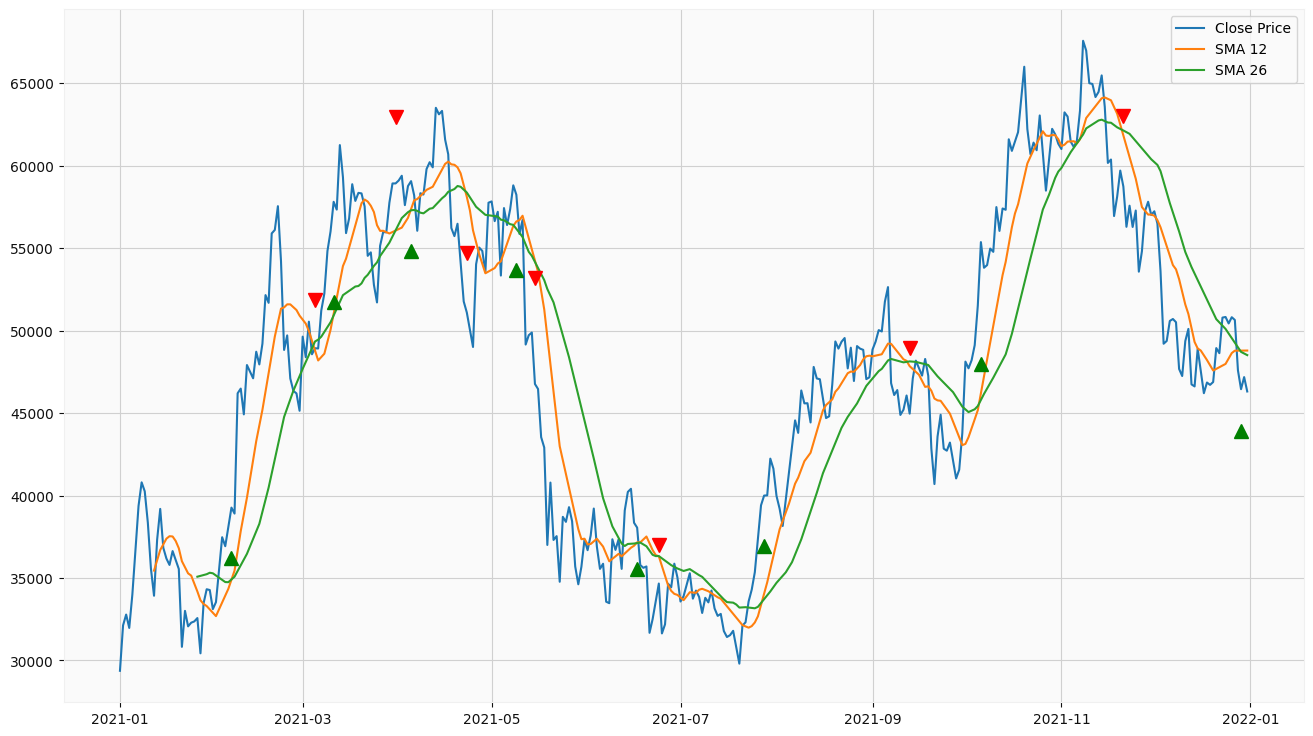

In [20]:
plt.figure(figsize=(16,9))
plt.plot(df.Close, label='Close Price')
plt.plot(df.sma_short, label='SMA 12')
plt.plot(df.sma_long, label='SMA 26')
plt.plot(a.marker_position, 'g^', markersize=10)
plt.plot(b.marker_position, 'rv', markersize=10)
plt.legend()